In [49]:
# Dependencies and Setup
import pandas as pd
import os
import matplotlib.pyplot as plt
import numpy as np
import hvplot.pandas
from geopy.geocoders import Nominatim
import scipy.stats as st

In [2]:
csv = os.path.join("Resources/Life_expectancy_data_Proj_1.csv")
GDP = os.path.join("Resources/GDPbillions.csv")
csv2= os.path.join("Resources/percapita.csv")

In [3]:
df = pd.read_csv(csv)

In [4]:
df.dropna(how='any')
df.dtypes

Country     object
Year       float64
Female     float64
Male       float64
Total      float64
dtype: object

In [5]:
df.head()

,Country,Year,Female,Male,Total
0,Australia,1921.0,63.18,59.10,60.97
1,Australia,1922.0,65.11,60.88,62.83
2,Australia,1923.0,63.66,59.98,61.68
3,Australia,1924.0,64.51,60.77,62.48
4,Australia,1925.0,65.38,61.30,63.17


In [6]:
df.count()

Country    414
Year       411
Female     411
Male       411
Total      411
dtype: int64

In [7]:
life_df1 = df.loc[df["Year"] > 2007, ["Country", "Year", "Female", "Male", "Total"]]

In [8]:
life_df2 = life_df1.loc[life_df1["Year"] < 2019, ["Country", "Year", "Female", "Male", "Total"]]

In [9]:
life_df2.head()

,Country,Year,Female,Male,Total
87,Australia,2008.0,83.70,79.14,81.43
88,Australia,2009.0,84.00,79.44,81.73
89,Australia,2010.0,84.20,79.81,82.02
90,Australia,2011.0,84.25,79.92,82.09
91,Australia,2012.0,84.30,80.27,82.30


In [10]:
# Use the code provided to separate the data by year
Aus = life_df2[(life_df2["Country"] == 'Australia')]
Chil = life_df2[(life_df2["Country"] == 'Chile')]
HngKng = life_df2[(life_df2["Country"] == 'Hong Kong')]
Hun = life_df2[(life_df2["Country"] == 'Hungary')]
USA = life_df2[(life_df2["Country"] == 'United States')]


#Group by "Country" and take the mean of each of life expectancy disregarding gender.
mean_life_01 = Aus.groupby(["Year"]).mean()["Total"]
mean_life_02 = Chil.groupby(["Year"]).mean()["Total"]
mean_life_03 = HngKng.groupby(["Year"]).mean()["Total"]
mean_life_04 = Hun.groupby(["Year"]).mean()["Total"]
mean_life_05 = USA.groupby(["Year"]).mean()["Total"]


#Data frame of life expectancy by country
life_ex_country_df = pd.DataFrame({"Australia": mean_life_01,
    "Chile": mean_life_02,
    "Hong Kong": mean_life_03,
    "Hungary": mean_life_04,
    "United States": mean_life_05                               
   })

life_ex_country_df




,Australia,Chile,Hong Kong,Hungary,United States
Year,,,,,
2008.0,81.43,78.24,82.03,73.96,78.17
2009.0,81.73,78.40,82.59,74.18,78.52
2010.0,82.02,78.15,82.80,74.52,78.71
2011.0,82.09,78.78,83.24,74.91,78.76
2012.0,82.30,78.79,83.28,75.18,78.87
2013.0,82.55,78.99,83.84,75.68,78.88
2014.0,82.52,79.09,83.94,75.85,78.94
2015.0,82.60,79.30,84.15,75.65,78.79
2016.0,82.81,79.57,84.31,76.16,78.76


## Life Expectancy Between 2008-2018

In [11]:

y_axis = life_ex_country_df.values.tolist()
x_axis = [life_ex_country_df.columns.values.tolist()]

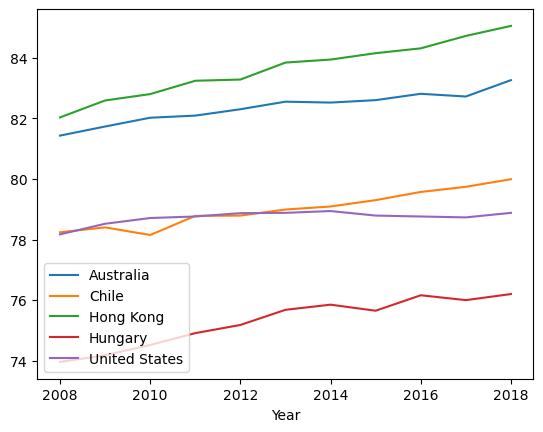

In [12]:
plot = life_ex_country_df.plot.line()

In [13]:
csv1= os.path.join("Resources/GDPbillions.csv")
new_df=pd.read_csv(csv1)
gdp_df=new_df.set_index('Country')

gdp_df


,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,
Australia,1055.64,928.63,1148.61,1398.41,1546.89,1576.38,1467.55,1350.62,1206.54,1326.52,1428.29
Chile,179.66,171.41,217.11,251.22,267.18,277.24,259.41,242.50,249.30,276.36,295.40
Hong Kong,219.28,214.05,228.64,248.51,262.63,275.70,291.46,309.38,320.86,341.27,361.73
Hungary,158.33,131.07,132.18,141.94,128.81,135.68,141.03,125.17,128.61,143.11,160.56
United States,14769.86,14478.06,15048.96,15599.73,16253.97,16843.19,17550.68,18206.02,18695.11,19477.34,20533.06


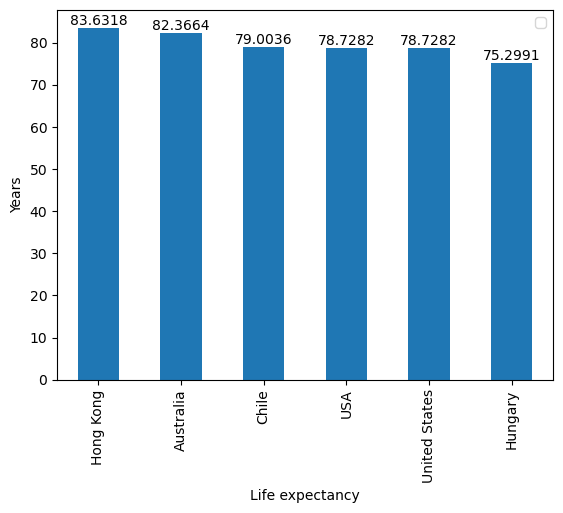

In [50]:
#Plotting average life expectancy and sorting in descending order
new_df= life_df2.groupby('Country').mean()['Total']
new_df= new_df.to_frame().reset_index()
new1_df= new_df.sort_values(['Total'], ascending=[False])
new1_df=new1_df.set_index(["Country"])
ax=new1_df.plot(kind='bar')
ax.bar_label(ax.containers[0])
ax.set_xlabel('Life expectancy')
ax.set_ylabel('Years')
ax.legend([])

# GDP Between 2008-2018

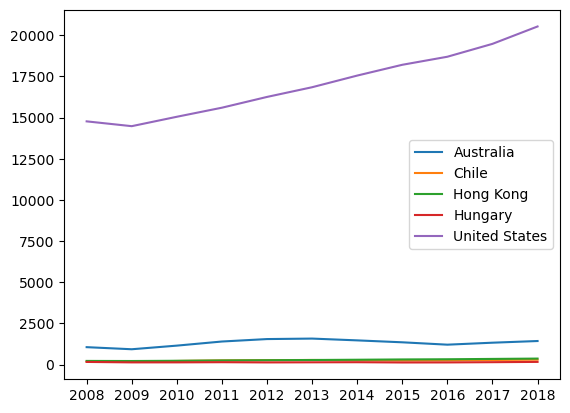

<Figure size 640x480 with 0 Axes>

In [14]:
for index, row in gdp_df.iterrows():
    plt.plot(row, label=index)
    plt.legend()
plt.xlabel=("Years")
plt.ylabel=('GDP in $Billions')
plt.show()
plt.tight_layout()

In [ ]:
pcap_df=pd.read_csv(csv2)
percap_df =pcap_df.set_index('Country')
percap_df

In [52]:
#Plotting average GDP over the 10 years
percap1_df=percap_df.transpose()
aus_gdp = gdp1_df['Australia'].mean()
chi_gdp = gdp1_df['Chile'].mean()
hon_gdp = gdp1_df['Hong Kong '].mean()
hun_gdp = gdp1_df['Hungary'].mean()
usa_gdp = gdp1_df['United States'].mean()
avg_gdp=pd.DataFrame({'Average GDP':[hon_gdp,aus_gdp,chi_gdp,usa_gdp,hun_gdp]},
                        index = ['Hong Kong ','Australia','Chile','United states','Hungary'])
ax=avg_gdp.plot(kind='bar')
ax.bar_label(ax.containers[0])
ax.set_xlabel('Average GDP')
ax.set_ylabel('Billion $')
ax.legend([])

NameError: name 'percap_df' is not defined

In [ ]:
#Plotting average Percapita Income over the 10 years
aus_per = percap1_df['Australia'].mean()
chi_per = percap1_df['Chile'].mean()
hon_per = percap1_df['Hong Kong '].mean()
hun_per = percap1_df['Hungary'].mean()
usa_per = percap1_df['United States'].mean()
avg_percap=pd.DataFrame({'Average Percapita':[hon_per,aus_per,chi_per,usa_per,hun_per]},
                        index = ['Hong Kong ','Australia','Chile','United states','Hungary'])
ax=avg_percap.plot(kind='bar')
ax.bar_label(ax.containers[0])
ax.set_xlabel('Average Percapita Income')
ax.set_ylabel('x 1000$')
ax.legend([])

In [ ]:
#Plotting male vs female for each country
male_df= life_df2.groupby('Country').mean()['Male']
female_df= life_df2.groupby('Country').mean()['Female']
gender_df= pd.concat([male_df,female_df],axis=1)
gender_df = gender_df.sort_values(['Female'], ascending=[False])
ax=gender_df.plot.bar()
ax.set_ylabel('Life expectancy in Years')

In [ ]:
#Plotting changes in percapita income over the 10 years
for index, row in percap_df.iterrows():
    plt.plot(row, label=index)
    plt.legend()
plt.xlabel=("Years")
plt.ylabel=('Percapita in K$')
plt.show()
plt.tight_layout()

## Correlation Between Life Expectancy & GDP

In [15]:
#Seperate out and group 
yr2008 = life_df2[(life_df2["Year"] == 2008)]
yr2009 = life_df2[(life_df2["Year"] == 2009)]
yr2010 = life_df2[(life_df2["Year"] == 2010)]
yr2011 = life_df2[(life_df2["Year"] == 2011)]
yr2012 = life_df2[(life_df2["Year"] == 2012)]
yr2013 = life_df2[(life_df2["Year"] == 2013)]
yr2014 = life_df2[(life_df2["Year"] == 2014)]
yr2015 = life_df2[(life_df2["Year"] == 2015)]
yr2016 = life_df2[(life_df2["Year"] == 2016)]
yr2017 = life_df2[(life_df2["Year"] == 2017)]
yr2018 = life_df2[(life_df2["Year"] == 2018)]

lfe_yr08 = yr2008.groupby(["Country"]).first(numeric_only=True)["Total"]
lfe_yr09 = yr2009.groupby(["Country"]).first(numeric_only=True)["Total"]
lfe_yr10 = yr2010.groupby(["Country"]).first(numeric_only=True)["Total"]
lfe_yr11 = yr2011.groupby(["Country"]).first(numeric_only=True)["Total"]
lfe_yr12 = yr2012.groupby(["Country"]).first(numeric_only=True)["Total"]
lfe_yr13 = yr2013.groupby(["Country"]).first(numeric_only=True)["Total"]
lfe_yr14 = yr2014.groupby(["Country"]).first(numeric_only=True)["Total"]
lfe_yr15 = yr2015.groupby(["Country"]).first(numeric_only=True)["Total"]
lfe_yr16 = yr2016.groupby(["Country"]).first(numeric_only=True)["Total"]
lfe_yr17 = yr2017.groupby(["Country"]).first(numeric_only=True)["Total"]
lfe_yr18 = yr2018.groupby(["Country"]).first(numeric_only=True)["Total"]

life_ex_year_df = pd.DataFrame({"2008": lfe_yr08,
    "2009": lfe_yr09,
    "2010": lfe_yr10,
    "2011": lfe_yr11,
    "2012": lfe_yr12,
    "2013": lfe_yr13,
    "2014": lfe_yr14,
    "2015": lfe_yr15,
    "2016": lfe_yr16,
    "2017": lfe_yr17,
    "2018": lfe_yr18
   })

life_ex_year_df = life_ex_year_df.drop("United States", axis = 0, inplace= False)
life_ex_year_df.head()

,2008,2009,2010,2011,2012,2013,2014,2015,2016,2017,2018
Country,,,,,,,,,,,
Australia,81.43,81.73,82.02,82.09,82.30,82.55,82.52,82.60,82.81,82.72,83.26
Chile,78.24,78.40,78.15,78.78,78.79,78.99,79.09,79.30,79.57,79.74,79.99
Hong Kong,82.03,82.59,82.80,83.24,83.28,83.84,83.94,84.15,84.31,84.72,85.05
Hungary,73.96,74.18,74.52,74.91,75.18,75.68,75.85,75.65,76.16,76.00,76.20
USA,78.17,78.52,78.71,78.76,78.87,78.88,78.94,78.79,78.76,78.73,78.88


In [16]:
Aus_x = life_ex_year_df.loc["Australia"]
Aus_y = gdp_df.loc["Australia"]
Chil_x = life_ex_year_df.loc["Chile"]
Chil_y = gdp_df.loc["Chile"]
HngKng_x = life_ex_year_df.loc["Hong Kong"]
HngKng_y = gdp_df.loc["Hong Kong"]
Hun_x = life_ex_year_df.loc["Hungary"]
Hun_y = gdp_df.loc["Hungary"]
USA_x = life_ex_year_df.loc["USA"]
USA_y = gdp_df.loc["United States"]

The r value of Australlia's GDP vs. Life Expectancy is 0.6


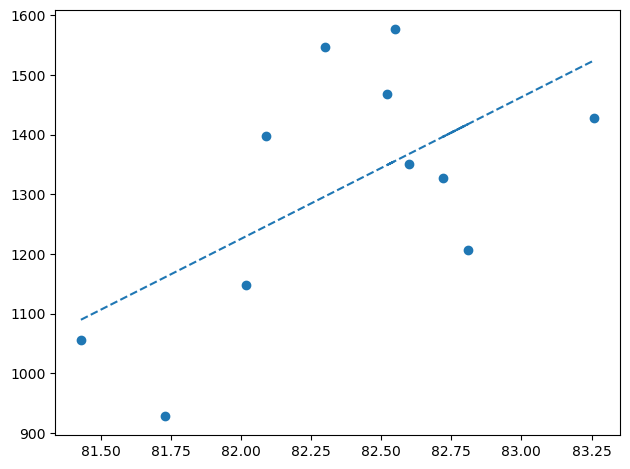

In [34]:
Aus_scat = plt.scatter(Aus_x, Aus_y, marker = 'o')
correlation = st.pearsonr(Aus_x, Aus_y)
Aus_slope, Aus_int, Aus_r, Aus_p, Aus_std_err = st.linregress(Aus_x, Aus_y)
Aus_linereg = Aus_slope * Aus_x + Aus_int
plt.plot(Aus_x, Aus_linereg,"--")
plt.xlabel='Life Expectancy Years'
plt.ylabel='GDP in $Billions'
plt.tight_layout()
print(f"The r value of Australlia's GDP vs. Life Expectancy is {round(correlation[0],2)}")

The r value of Chile's GDP vs. Life Expectancy is 0.77


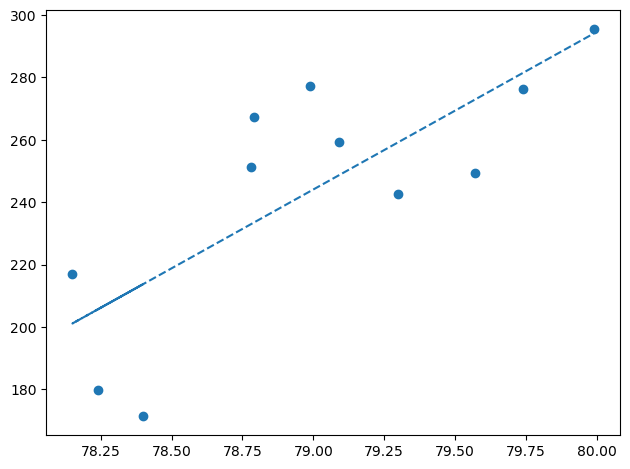

In [35]:
Chil_scat = plt.scatter(Chil_x, Chil_y, marker = 'o' )
correlation = st.pearsonr(Chil_x, Chil_y)
plt.xlabel= 'Life Expectancy Years'
Chil_slope, Chil_int, Chil_r, Chil_p, Chil_std_err = st.linregress(Chil_x, Chil_y)
Chil_linereg = Chil_slope * Chil_x + Chil_int
plt.plot(Chil_x, Chil_linereg,"--")
plt.ylabel= 'GDP in $Billions'
plt.tight_layout()
print(f"The r value of Chile's GDP vs. Life Expectancy is {round(correlation[0],2)}")

The r value of Hong Kong's GDP vs. Life Expectancy is 0.98


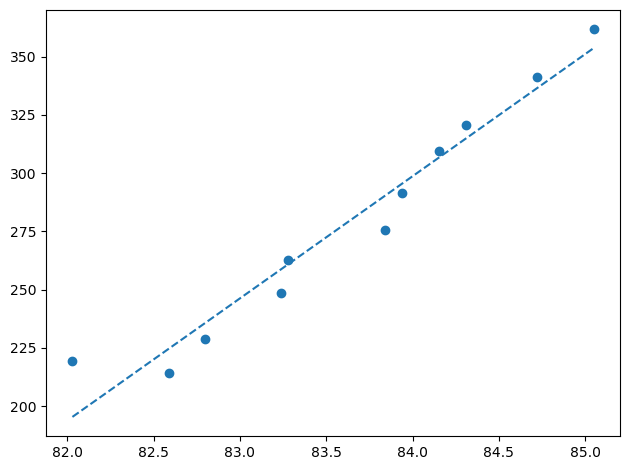

In [36]:
HngKng_scat = plt.scatter(HngKng_x, HngKng_y, marker = 'o')
correlation = st.pearsonr(HngKng_x, HngKng_y)
HngKng_slope, HngKng_int, HngKng_r, HngKng_p, HngKng_std_err = st.linregress(HngKng_x, HngKng_y)
HngKng_linereg = HngKng_slope * HngKng_x + HngKng_int
plt.plot(HngKng_x, HngKng_linereg,"--")
plt.xlabel = 'Life Expectancy Years'
plt.ylabe = 'GDP in $Billions'
plt.tight_layout()
print(f"The r value of Hong Kong's GDP vs. Life Expectancy is {round(correlation[0],2)}")

The r value of Hungary's GDP vs. Life Expectancy is -0.03


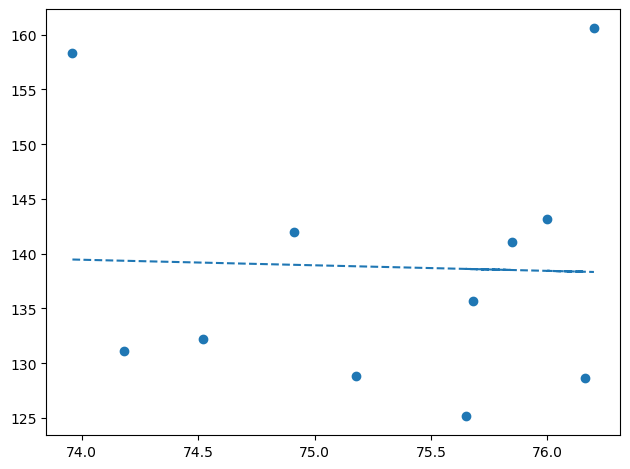

In [37]:
Hun_scat = plt.scatter(Hun_x, Hun_y, marker = 'o')
correlation = st.pearsonr(Hun_x, Hun_y)
Hun_slope, Hun_int, Hun_r, Hun_p, Hun_std_err = st.linregress(Hun_x, Hun_y)
Hun_linereg = Hun_slope * Hun_x + Hun_int
plt.plot(Hun_x, Hun_linereg,"--")
plt.xlabel= 'Life Expectancy Years'
plt.ylabel= 'GDP in $Billions'
plt.tight_layout()
print(f"The r value of Hungary's GDP vs. Life Expectancy is {round(correlation[0],2)}")

The r value of United States' GDP vs. Life Expectancy is 0.55


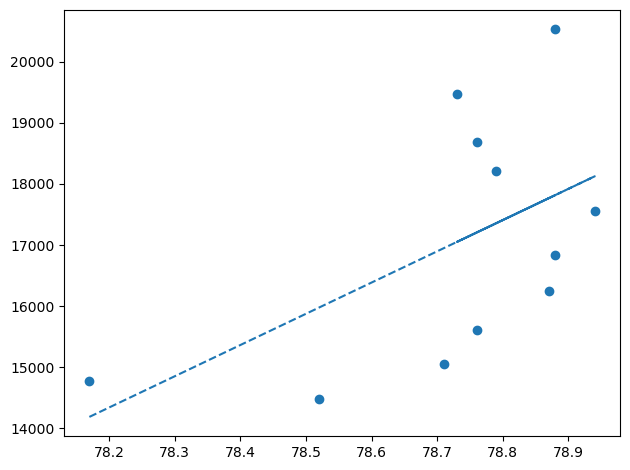

In [40]:
USA_scat= plt.scatter(USA_x, USA_y, marker = 'o')
correlation = st.pearsonr(USA_x, USA_y)
USA_slope, USA_int, USA_r, USA_p, USA_std_err = st.linregress(USA_x, USA_y)
USA_linereg = USA_slope * USA_x + USA_int
plt.plot(USA_x, USA_linereg,"--")
plt.xlabel = 'Life Expectancy Years'
plt.ylabel = 'GDP in $Billions'
plt.tight_layout()
print(f"The r value of United States' GDP vs. Life Expectancy is {round(correlation[0],2)}")

### Create a map that displays a point for every country 

In [53]:
# Initialize Nominatim API
geolocator = Nominatim(user_agent="Data_Cleaning")

# Create a dictionary containing coordinates
coordinates = {
    "City": ["Sydney", "Santiago", "Hong Kong", "Budapeste", "Washington DC"],
    "Country": ["Australia", "Chile", "Hong Kong", "Hungary", "United States"],
}

# Create a Pandas DataFrame containing coordinates
coordinates_df = pd.DataFrame(coordinates)
coordinates_df["Latitude"]= ""
coordinates_df["Longitude"]= ""
for index, c in coordinates_df.iterrows():
    city = c["City"]
    country = c["Country"]
    location = geolocator.geocode(f"{city},{country}")
    c["Latitude"] = location.latitude
    c["Longitude"] = location.longitude

# Display sample data
coordinates_df

,City,Country,Latitude,Longitude
0,Sydney,Australia,-33.869844,151.208285
1,Santiago,Chile,-33.437776,-70.65045
2,Hong Kong,Hong Kong,22.279328,114.162813
3,Budapeste,Hungary,47.497994,19.040359
4,Washington DC,United States,38.895037,-77.036543


In [23]:
%%capture --no-display

# Configure the map plot_1
map_plot_1 = coordinates_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width = 700,
    frame_height = 500,
    scale = 0.5,
    color = "Country"
)

# Display the map plot
map_plot_1

ImportError: Geographic projection support requires GeoViews and cartopy.

### Add the 2018 - GDP and Life Expectancy in the hover message for country

In [24]:
# Merge coordinates_df + life_ex_country_df + gdp_df and create an new df file only 2018
gdp_2018 = gdp_df["2018"]
life_expectancy_2018 = df.loc[df["Year"]== 2018, ["Country", "Year", "Female", "Male", "Total"]]

temp_df = coordinates_df.merge(gdp_2018,on=["Country"])
all_data_2018_df = temp_df.merge(life_expectancy_2018,on=["Country"])
all_data_2018_df.rename(columns={"2018": "GDP 2018 (Billions)", "Total": "Life Expectancy"}, inplace=True)
all_data_2018_df.drop(columns=["City","Female","Male"], inplace=True)

all_data_2018_df


,Country,Latitude,Longitude,GDP 2018 (Billions),Year,Life Expectancy
0,Australia,-33.869844,151.208285,1428.29,2018.0,83.26
1,Chile,-33.437776,-70.65045,295.40,2018.0,79.99
2,Hong Kong,22.279328,114.162813,361.73,2018.0,85.05
3,Hungary,47.497994,19.040359,160.56,2018.0,76.20
4,United States,38.895037,-77.036543,20533.06,2018.0,78.88


In [25]:
%%capture --no-display

# Configure the map plot_1
map_plot_2 = all_data_2018_df.hvplot.points(
    "Longitude",
    "Latitude",
    geo = True,
    tiles = "EsriNatGeo",
    frame_width = 700,
    frame_height = 500,
    scale = 0.5,
    hover_cols = ["Life Expectancy", "GDP 2018 (Billions)"],
    color = "Country"
)

# Display the map plot
map_plot_2

ImportError: Geographic projection support requires GeoViews and cartopy.

### Poverty Data

In [28]:
pov_file = "Resources/WB_Poverty_Data.csv"
life_ex_file = "Resources/Life_expectancy_data_Proj_1.csv"

pov_data_raw = pd.read_csv(pov_file)
life_ex_data = pd.read_csv(life_ex_file)

pov_data_raw.head()

,Country Name,Country Code,Indicator Name,Indicator Code,1960,1961,1962,1963,1964,1965,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,Unnamed: 66
0,Australia,AUS,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,0.5,NaN,0.5,NaN,0.5,NaN,NaN,NaN,NaN
1,Chile,CHL,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,0.5,NaN,0.4,NaN,0.3,NaN,NaN,0.7,NaN,NaN
2,Hong Kong,HKG,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Hungary,HUN,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,0.2,0.7,0.6,1.3,0.6,0.2,0.3,NaN,NaN,NaN
4,United States,USA,Poverty headcount ratio at $2.15 a day (2017 P...,SI.POV.DDAY,NaN,NaN,NaN,NaN,NaN,NaN,...,1.0,1.2,1.2,1.0,1.2,1.0,1.0,NaN,NaN,NaN


In [29]:
pov_data_filtered = pov_data_raw[["Country Name", "2008", "2009", "2010", "2011", "2012", "2013", "2014", "2015", "2016", "2017", "2018"]]
pov_data_filtered.set_index("Country Name", inplace=True)
pov_data_T = pov_data_filtered.T
pov_data_clean = pov_data_T.fillna(0)
pov_data_clean["Australia"] = pd.to_numeric(pov_data_clean["Australia"])
pov_data_clean["Chile"] = pd.to_numeric(pov_data_clean["Chile"])
pov_data_clean["Hong Kong"] = pd.to_numeric(pov_data_clean["Hong Kong"])
pov_data_clean["Hungary"] = pd.to_numeric(pov_data_clean["Hungary"])
pov_data_clean["United States"] = pd.to_numeric(pov_data_clean["United States"])

pov_data_final = pov_data_clean[["Australia", "Chile", "Hungary", "United States"]]

pov_data_final

Country Name,Australia,Chile,Hungary,United States
2008,0.4,0.0,0.0,1.0
2009,0.0,1.7,0.1,1.0
2010,0.3,0.0,0.1,1.0
2011,0.0,0.9,0.1,1.0
2012,0.0,0.0,0.3,1.0
2013,0.0,0.5,0.2,1.0
2014,0.5,0.0,0.7,1.2
2015,0.0,0.4,0.6,1.2
2016,0.5,0.0,1.3,1.0
2017,0.0,0.3,0.6,1.2


TypeError: 'str' object is not callable

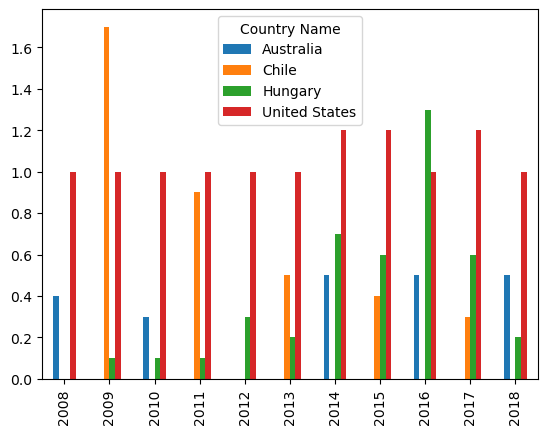

In [30]:
poverty_bar_plot = pov_data_final.plot.bar()
plt.xlabel("Year")
plt.ylabel("Poverty headcount ratio at $2.15 a day")
poverty_bar_plot
plt.savefig("Resources/Poverty_Bar_Graph.png")